In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Import Data

In [2]:
#####################################################################
### !!! This csv import to be replaced by import from DB instance !!!
### !!! For model design only !!!
#####################################################################

# Read CSV data and verify
sparse_county_df = pd.read_csv('../data/covid/sparse_county_covid.csv')
weather_df = pd.read_csv('../data/weather/county_weather.csv')
print(sparse_county_df.head())
print(weather_df.head())

   Unnamed: 0        date   county     state  total_cases  new_cases  \
0           0  2020-03-07  fairfax  virginia            1          1   
1           1  2020-03-08  fairfax  virginia            2          1   
2           2  2020-03-09  fairfax  virginia            4          2   
3           3  2020-03-10  fairfax  virginia            4          0   
4           4  2020-03-11  fairfax  virginia            4          0   

   future_delta7  future_delta14  
0            9.0            21.0  
1            8.0            29.0  
2            6.0            39.0  
3            8.0            42.0  
4           10.0            72.0  
   Unnamed: 0        date     county     state  temp_mean(C)  precip_sum(mm)  \
0           0  2020-01-01  baltimore  maryland           4.7             0.0   
1           1  2020-01-02  baltimore  maryland           4.2             0.0   
2           2  2020-01-03  baltimore  maryland           9.0             6.8   
3           3  2020-01-04  baltimore 

## Data Description

In [3]:
sparse_county_df.describe()

,Unnamed: 0,total_cases,new_cases,future_delta7,future_delta14
count,2484.000000,2484.000000,2484.000000,2421.000000,2358.000000
mean,1241.500000,21799.116345,222.941224,1550.011979,3074.367684
std,717.213357,32134.469596,442.387108,2159.585946,4100.141668
min,0.000000,1.000000,-95.000000,0.000000,0.000000
25%,620.750000,3026.250000,41.000000,372.000000,763.750000
50%,1241.500000,12281.500000,111.000000,881.000000,1771.000000
75%,1862.250000,24740.000000,217.250000,1494.000000,2996.250000
max,2483.000000,196658.000000,14129.000000,20378.000000,26434.000000


In [4]:
weather_df.describe()

,Unnamed: 0,temp_mean(C),precip_sum(mm),wind_max(km/h),min_humidity(%),max_humidity(%),mean_humidity(%)
count,5856.00000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000
mean,2927.50000,15.345765,3.404747,17.787551,53.839822,88.656079,72.357411
std,1690.62592,8.906957,7.708832,6.751167,15.457784,10.897577,13.085196
min,0.00000,-13.000000,0.000000,5.000000,10.000000,33.000000,24.000000
25%,1463.75000,8.100000,0.000000,12.875000,42.000000,83.000000,63.000000
50%,2927.50000,15.800000,0.100000,16.600000,53.000000,92.000000,73.000000
75%,4391.25000,23.300000,3.000000,21.600000,64.000000,97.000000,82.000000
max,5855.00000,33.000000,98.300000,68.400000,100.000000,100.000000,100.000000


## Drop irrelevant data rows

In [5]:
sparse_county_df

,Unnamed: 0,date,county,state,total_cases,new_cases,future_delta7,future_delta14
0,0,2020-03-07,fairfax,virginia,1,1,9.0,21.0
1,1,2020-03-08,fairfax,virginia,2,1,8.0,29.0
2,2,2020-03-09,fairfax,virginia,4,2,6.0,39.0
3,3,2020-03-10,fairfax,virginia,4,0,8.0,42.0
4,4,2020-03-11,fairfax,virginia,4,0,10.0,72.0
...,...,...,...,...,...,...,...,...
2479,2479,2020-12-01,bexar,texas,81638,452,NaN,NaN
2480,2480,2020-12-02,bexar,texas,83137,1499,NaN,NaN
2481,2481,2020-12-03,bexar,texas,83897,760,NaN,NaN
2482,2482,2020-12-04,bexar,texas,85213,1316,NaN,NaN


In [6]:
sparse_county_df = sparse_county_df[sparse_county_df['new_cases'] >= 0]
sparse_county_df

,Unnamed: 0,date,county,state,total_cases,new_cases,future_delta7,future_delta14
0,0,2020-03-07,fairfax,virginia,1,1,9.0,21.0
1,1,2020-03-08,fairfax,virginia,2,1,8.0,29.0
2,2,2020-03-09,fairfax,virginia,4,2,6.0,39.0
3,3,2020-03-10,fairfax,virginia,4,0,8.0,42.0
4,4,2020-03-11,fairfax,virginia,4,0,10.0,72.0
...,...,...,...,...,...,...,...,...
2479,2479,2020-12-01,bexar,texas,81638,452,NaN,NaN
2480,2480,2020-12-02,bexar,texas,83137,1499,NaN,NaN
2481,2481,2020-12-03,bexar,texas,83897,760,NaN,NaN
2482,2482,2020-12-04,bexar,texas,85213,1316,NaN,NaN


## Combine Weather and Covid data

In [7]:
# Sort weather data according to the sparse or dense county sets
sparse_counties = sparse_county_df['county'].unique()

# Sort weather for each set
sparse_weather_df = weather_df[weather_df['county'].isin(sparse_counties)]

In [8]:
# Merge county and weather data
columns_to_keep = ['new_cases','temp_mean(C)','precip_sum(mm)','wind_max(km/h)','min_humidity(%)','max_humidity(%)','mean_humidity(%)','future_delta7']

# Sparse counties
sparse_county_weather_df = sparse_county_df.merge(sparse_weather_df,on=['date','county'])
sparse_county_weather_df = sparse_county_weather_df[columns_to_keep]

sparse_county_weather_df

,new_cases,temp_mean(C),precip_sum(mm),wind_max(km/h),min_humidity(%),max_humidity(%),mean_humidity(%),future_delta7
0,1,5.0,0.0,27.6,30,65,48.0,9.0
1,1,6.8,0.0,16.7,24,67,47.0,8.0
2,2,11.7,0.0,18.8,30,69,50.0,6.0
3,0,14.6,2.1,29.8,49,95,69.0,8.0
4,0,9.1,0.6,15.7,63,91,73.0,10.0
...,...,...,...,...,...,...,...,...
2473,452,7.9,0.0,16.8,32,82,58.0,NaN
2474,1499,12.9,0.0,20.9,36,92,68.0,NaN
2475,760,8.6,0.0,19.4,40,54,48.0,NaN
2476,1316,7.8,0.0,11.5,42,75,59.0,NaN


# Prepare Data for Model

In [13]:
# Split Data into training and test sets
training_set = ['new_cases','temp_mean(C)','precip_sum(mm)','wind_max(km/h)','min_humidity(%)','max_humidity(%)','mean_humidity(%)']

sparse7 = sparse_county_weather_df.dropna()

# prepare 7-day set
target = ['future_delta7']
X = sparse7[training_set]
y = sparse7[target_7]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

## Fit and test Models

In [14]:
model = LinearRegression()

In [15]:
### 7-day change model
model.fit(X_train,y_train)
training_score = model7.score(X_train,y_train)
testing_score = model7.score(X_test,y_test)

print(f"7-day Training Score: {training_score}")
print(f"7-day Testing Score: {testing_score}")

7-day Training Score: 0.334778235771664
7-day Testing Score: 0.3831200472892764


In [16]:
print('Weight Coefficients: ',model.coef_)
print('y intercept: ', model.intercept_)

Weight Coefficients:  [[  2.4543641   41.74843552 -15.78875902  16.34739434  -1.20443845
  -12.51375573  11.38233072]]
y intercept:  [322.29709489]


In [18]:
# Get Mean Squared Error
from sklearn.metrics import mean_squared_error
training_error = mean_squared_error(y_train,model.predict(X_train))
testing_error = mean_squared_error(y_test,model.predict(X_test))

print(f"Training error: {training_error}")
print(f"Testing error: {testing_error}")

NameError: name 'y_train' is not defined

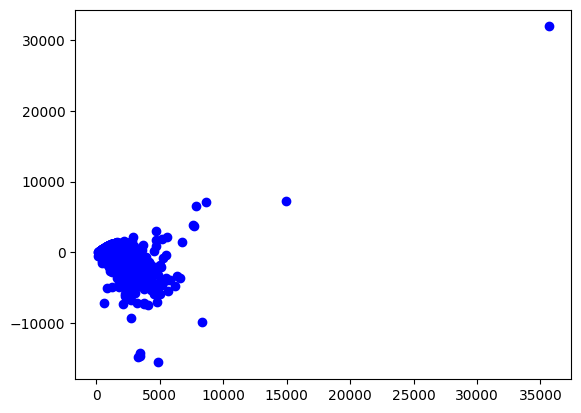

In [17]:
import matplotlib.pyplot as plt

plt.scatter(model.predict(X_train),model.predict(X_train) - y_train, c='blue',label="Training Data")
plt.show()